In [99]:
import cv2
import numpy as np
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.style.use('ggplot')

In [162]:
col = 15
row = 20
img = np.asarray(Image.open('fh2.png').convert('L').resize((28*15,28*20)))

In [163]:
dx = img.shape[0]//row
dy = img.shape[1]//col
dx,dy,img.shape

(28, 28, (560, 420))

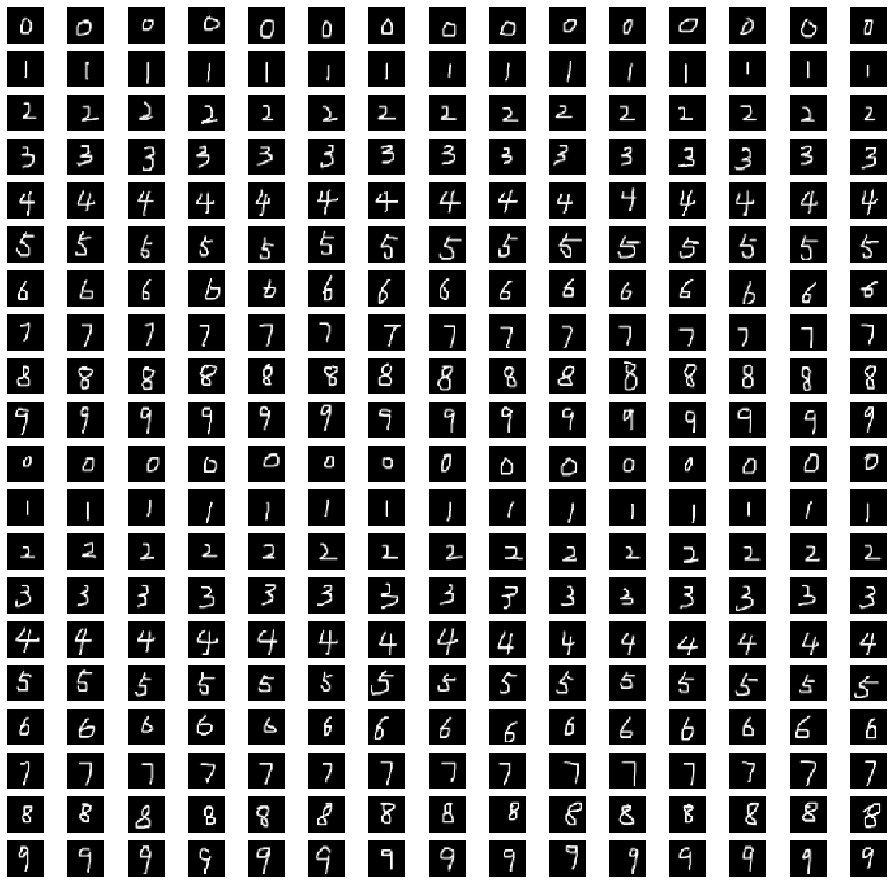

In [164]:
x = np.zeros((col*row,28,28))
y = np.zeros((col*row))
idx=0
plt.figure(figsize=(16,16))
for i in range(row):
    for j in range(col):
        x[idx] = np.asarray(ImageOps.invert(Image.fromarray(img[i*dx:i*dx+dx,j*dy:j*dy+dy].astype('uint8'))))
        x[idx][:,-2:] = x[idx][:,:2] = x[idx][:2,:] = x[idx][-2:,:] = 0
        plt.subplot(20,15,idx+1)
        plt.imshow(x[idx],cmap='gray')
        plt.axis('off')
        idx+=1

In [165]:
np.save('fh2',x)

In [166]:
np.save('fh',np.concatenate((np.load('fh1.npy'),np.load('fh2.npy'))))